In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import plotly.express as py
import plotly.offline

dataset1 = pd.read_csv("rainfall in india 1901-2015.csv")
dataset2 = pd.read_csv("district wise rainfall normal.csv")

In [2]:
dataset1.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [3]:
dataset1.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
dataset2.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000
mean,18.355070,20.984399,30.034789,45.543214,81.535101,196.007332,326.033697,291.152262,194.609048,90.446334,34.117473,18.150858,1346.969579,39.339470,157.113105,1007.80234,142.714665
std,21.082806,27.729596,45.451082,71.556279,111.960390,196.556284,221.364643,152.647325,99.830540,74.990685,59.371274,32.711009,838.878874,47.212773,213.445888,629.33261,148.951752
min,0.000000,0.000000,0.000000,0.000000,0.900000,3.800000,11.600000,14.100000,8.600000,3.100000,1.200000,0.000000,94.600000,0.000000,1.500000,39.60000,5.600000
25%,6.900000,7.000000,7.000000,5.000000,12.100000,68.800000,206.400000,194.600000,128.800000,34.300000,6.600000,5.300000,830.400000,14.700000,27.800000,625.40000,51.600000
50%,13.300000,12.300000,12.700000,15.100000,33.900000,131.900000,293.700000,284.800000,181.300000,62.600000,12.900000,7.900000,1116.200000,27.700000,67.200000,896.60000,86.700000
75%,19.200000,24.100000,33.200000,48.300000,91.900000,226.600000,374.800000,358.100000,234.100000,130.200000,32.300000,14.900000,1530.900000,41.100000,172.400000,1193.80000,175.200000
max,144.500000,229.600000,367.900000,554.400000,733.700000,1476.200000,1820.900000,1522.100000,826.300000,517.700000,475.100000,297.700000,7229.300000,335.300000,1256.500000,5228.00000,1048.500000


In [5]:
dataset2

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


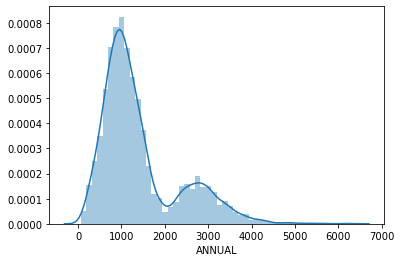

In [6]:
sns.distplot(dataset1['ANNUAL'], hist =True)

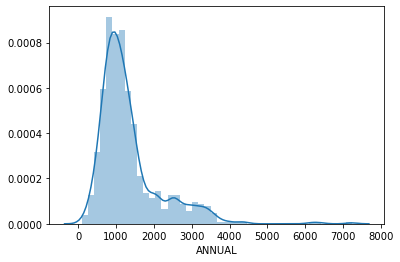

In [7]:
sns.distplot(dataset2['ANNUAL'], hist =True)

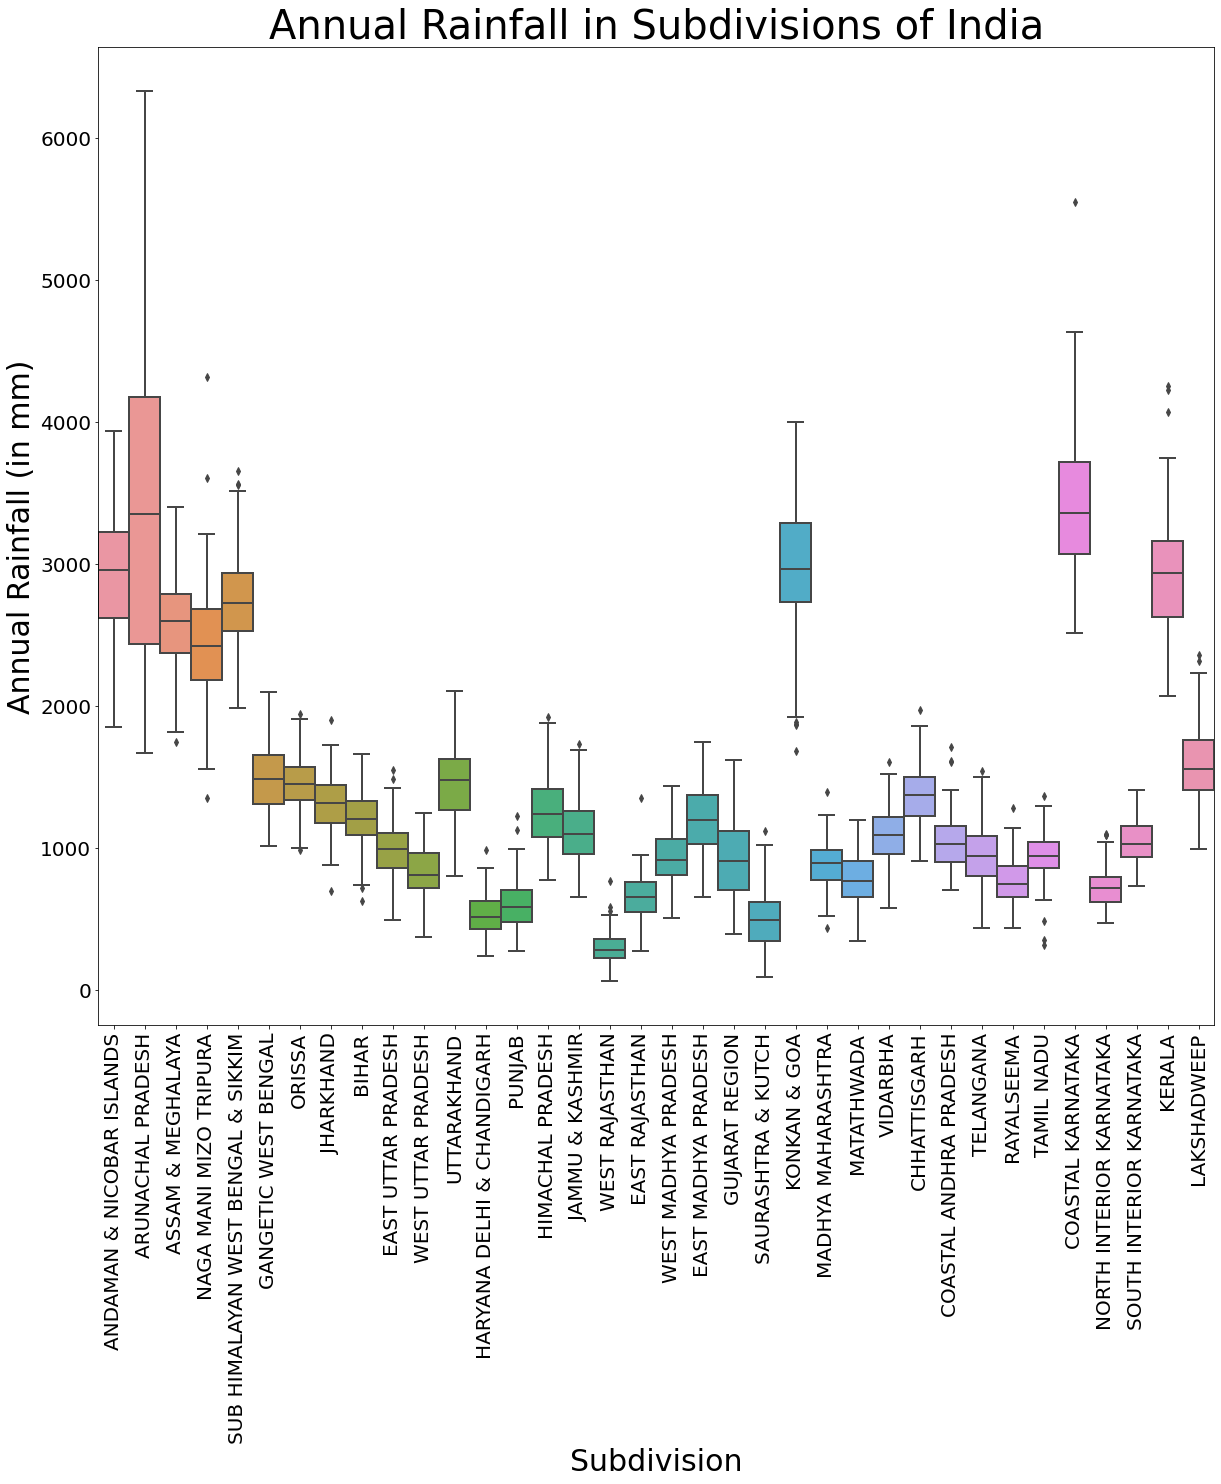

In [8]:
plt.figure(figsize=(20,18))
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=dataset1, width=1, linewidth=2)
ax.set_xlabel('Subdivision',fontsize=30)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=30)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=40)
ax.tick_params(axis='x', labelsize=20, rotation=90)
ax.tick_params(axis='y', labelsize=20, rotation=0)

Text(0.5, 1.0, 'Annual Rainfall received')

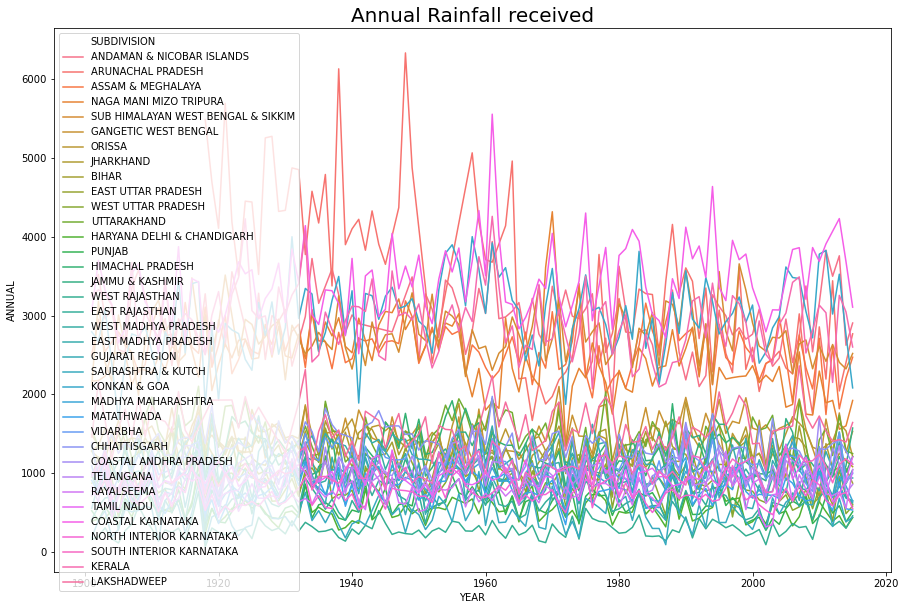

In [9]:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'YEAR', y= 'ANNUAL', hue = 'SUBDIVISION', data = dataset1)
plt.title('Annual Rainfall received',fontsize=20)

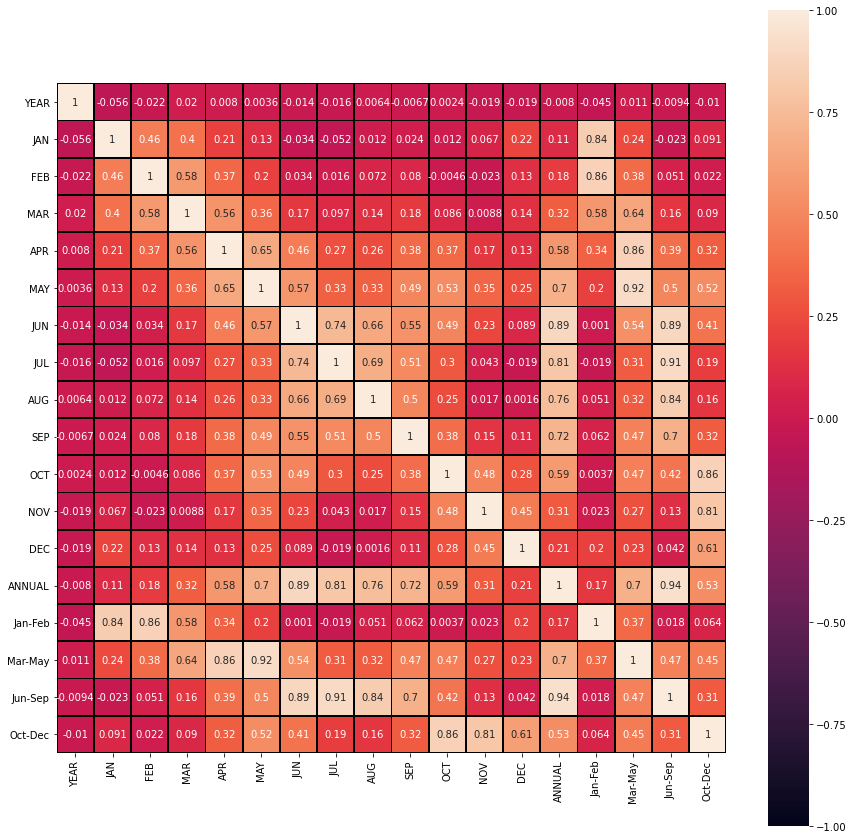

In [10]:
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(dataset1.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

<Figure size 864x864 with 0 Axes>

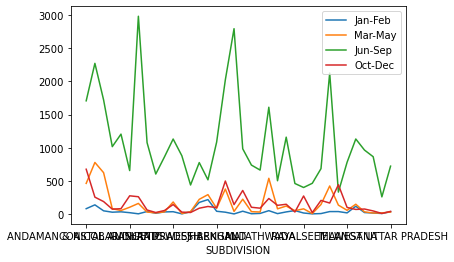

In [11]:
plt.figure(figsize=(12,12))
df=dataset1[["SUBDIVISION",'Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").mean().copy()
df
df[['Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].plot()

<Figure size 720x144 with 0 Axes>

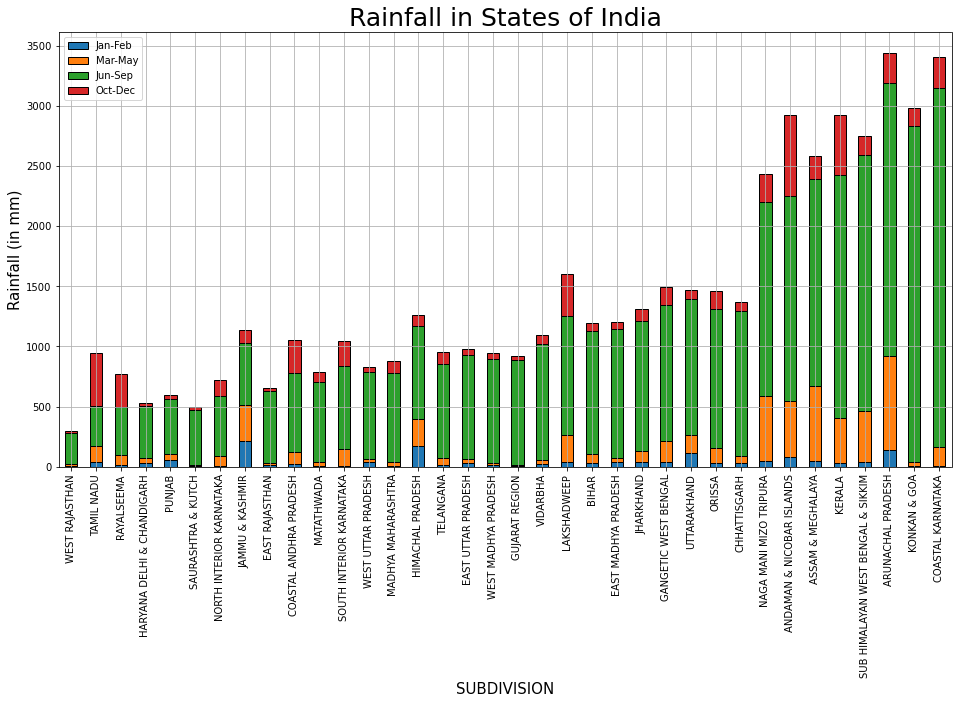

In [12]:
plt.figure(figsize=(10,2))
dataset1[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").mean().sort_values('Jun-Sep').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(16,8))
plt.xlabel('SUBDIVISION',fontsize=15)
plt.ylabel('Rainfall (in mm)',fontsize=15)
plt.title('Rainfall in States of India',fontsize=25)
plt.grid()

In [13]:
data=dataset1.pivot_table('ANNUAL',index='SUBDIVISION',columns=['YEAR'],aggfunc='median',margins=True)
data.interpolate(axis=0,inplace=True,method="linear")
data.fillna(method="bfill",inplace=True)
data=data.iloc[36][89:115]
data.to_csv('rain_air.csv')
data

YEAR
1990    1392.10
1991    1033.20
1992    1026.05
1993    1100.60
1994    1418.65
1995    1196.30
1996    1096.30
1997    1137.80
1998    1162.65
1999    1147.25
2000    1068.40
2001    1000.55
2002     914.65
2003    1128.55
2004    1017.65
2005    1267.85
2006    1197.25
2007    1133.10
2008    1111.35
2009     928.50
2010    1107.55
2011    1075.65
2012    1034.70
2013    1232.75
2014     966.80
2015    1064.45
Name: All, dtype: float64

In [15]:
data1=dataset1.drop('SUBDIVISION',axis=1).pivot_table(index='YEAR',aggfunc='median',margins=True)
data1.rename(columns={"Jan-Feb": "JAN-FEB", "Jun-Sep": "JUN-SEP","Mar-May":"MAR-MAY","Oct-Dec":"OCT-DEC"},inplace=True)
data1.to_csv('rain_temp.csv')
data1

,ANNUAL,APR,AUG,DEC,FEB,JAN,JUL,JUN,JAN-FEB,JUN-SEP,MAR,MAY,MAR-MAY,NOV,OCT,OCT-DEC,SEP
YEAR,,,,,,,,,,,,,,,,,
1901,993.80,26.10,285.60,1.20,31.80,26.50,237.80,77.70,64.30,700.90,11.10,37.30,78.60,5.40,38.60,48.80,123.40
1902,951.60,11.00,199.30,7.30,0.70,3.40,270.70,78.80,5.20,811.20,2.90,36.80,57.10,10.40,33.20,72.40,202.70
1903,1197.25,4.70,277.60,1.50,4.00,6.50,264.20,102.80,14.30,866.80,1.30,56.40,80.40,1.25,141.30,170.25,210.40
1904,982.20,6.30,184.30,3.80,3.00,3.20,273.00,120.60,9.80,714.10,16.30,61.10,110.00,4.10,76.20,91.40,135.60
1905,891.60,18.30,219.30,0.60,12.70,7.30,254.50,66.10,23.40,805.40,14.30,50.40,79.60,0.70,19.60,35.60,170.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,1034.70,27.55,272.75,3.00,1.95,15.30,260.80,77.00,20.90,882.65,1.75,9.95,50.90,11.60,63.50,95.65,210.00
2013,1232.75,24.55,243.05,2.25,23.10,2.65,301.90,212.90,29.05,938.35,5.10,30.40,76.05,2.65,124.90,130.15,162.30
2014,966.80,9.35,236.05,9.00,17.45,3.85,274.75,63.10,28.60,759.10,20.65,55.15,118.00,3.90,42.85,68.30,153.55
